In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
loan= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
loan.shape

(5000, 14)

In [9]:
loan.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [10]:
loan.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

#### Minimum experience is showing negative values, which are incorrect, so we have to cleansing the data.

In [12]:
loan.Experience.replace(-1,1,inplace=True)
loan.Experience.replace(-2,2,inplace=True)
loan.Experience.replace(-3,3,inplace=True)

In [13]:
loan.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [11]:
loan.Income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

### Number of unique in each column?

In [14]:
loan.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [15]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Number of people with zero mortgage?

#### 3462

###  Number of people with zero credit card spending per month?

#### 106


In [17]:
np.count_nonzero(loan["Mortgage"])

1538

In [22]:
loan.isin([0]).sum()

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

In [23]:
loan.isna().sum() # Gives the sum of null values.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
loan.apply(lambda x: x.value_counts())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0.0,NaN,NaN,66.0,NaN,NaN,NaN,106.0,NaN,3462.0,4520.0,4478.0,4698.0,2016.0,3530.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96094.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96145.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96150.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
loan.apply(lambda x: x.value_counts()).T.stack()

ID          1.0       1.0
            2.0       1.0
            3.0       1.0
            4.0       1.0
            5.0       1.0
                    ...  
CD Account  1.0     302.0
Online      0.0    2016.0
            1.0    2984.0
CreditCard  0.0    3530.0
            1.0    1470.0
Length: 6190, dtype: float64

## Exploratory Data Analysis

### Observation on given data



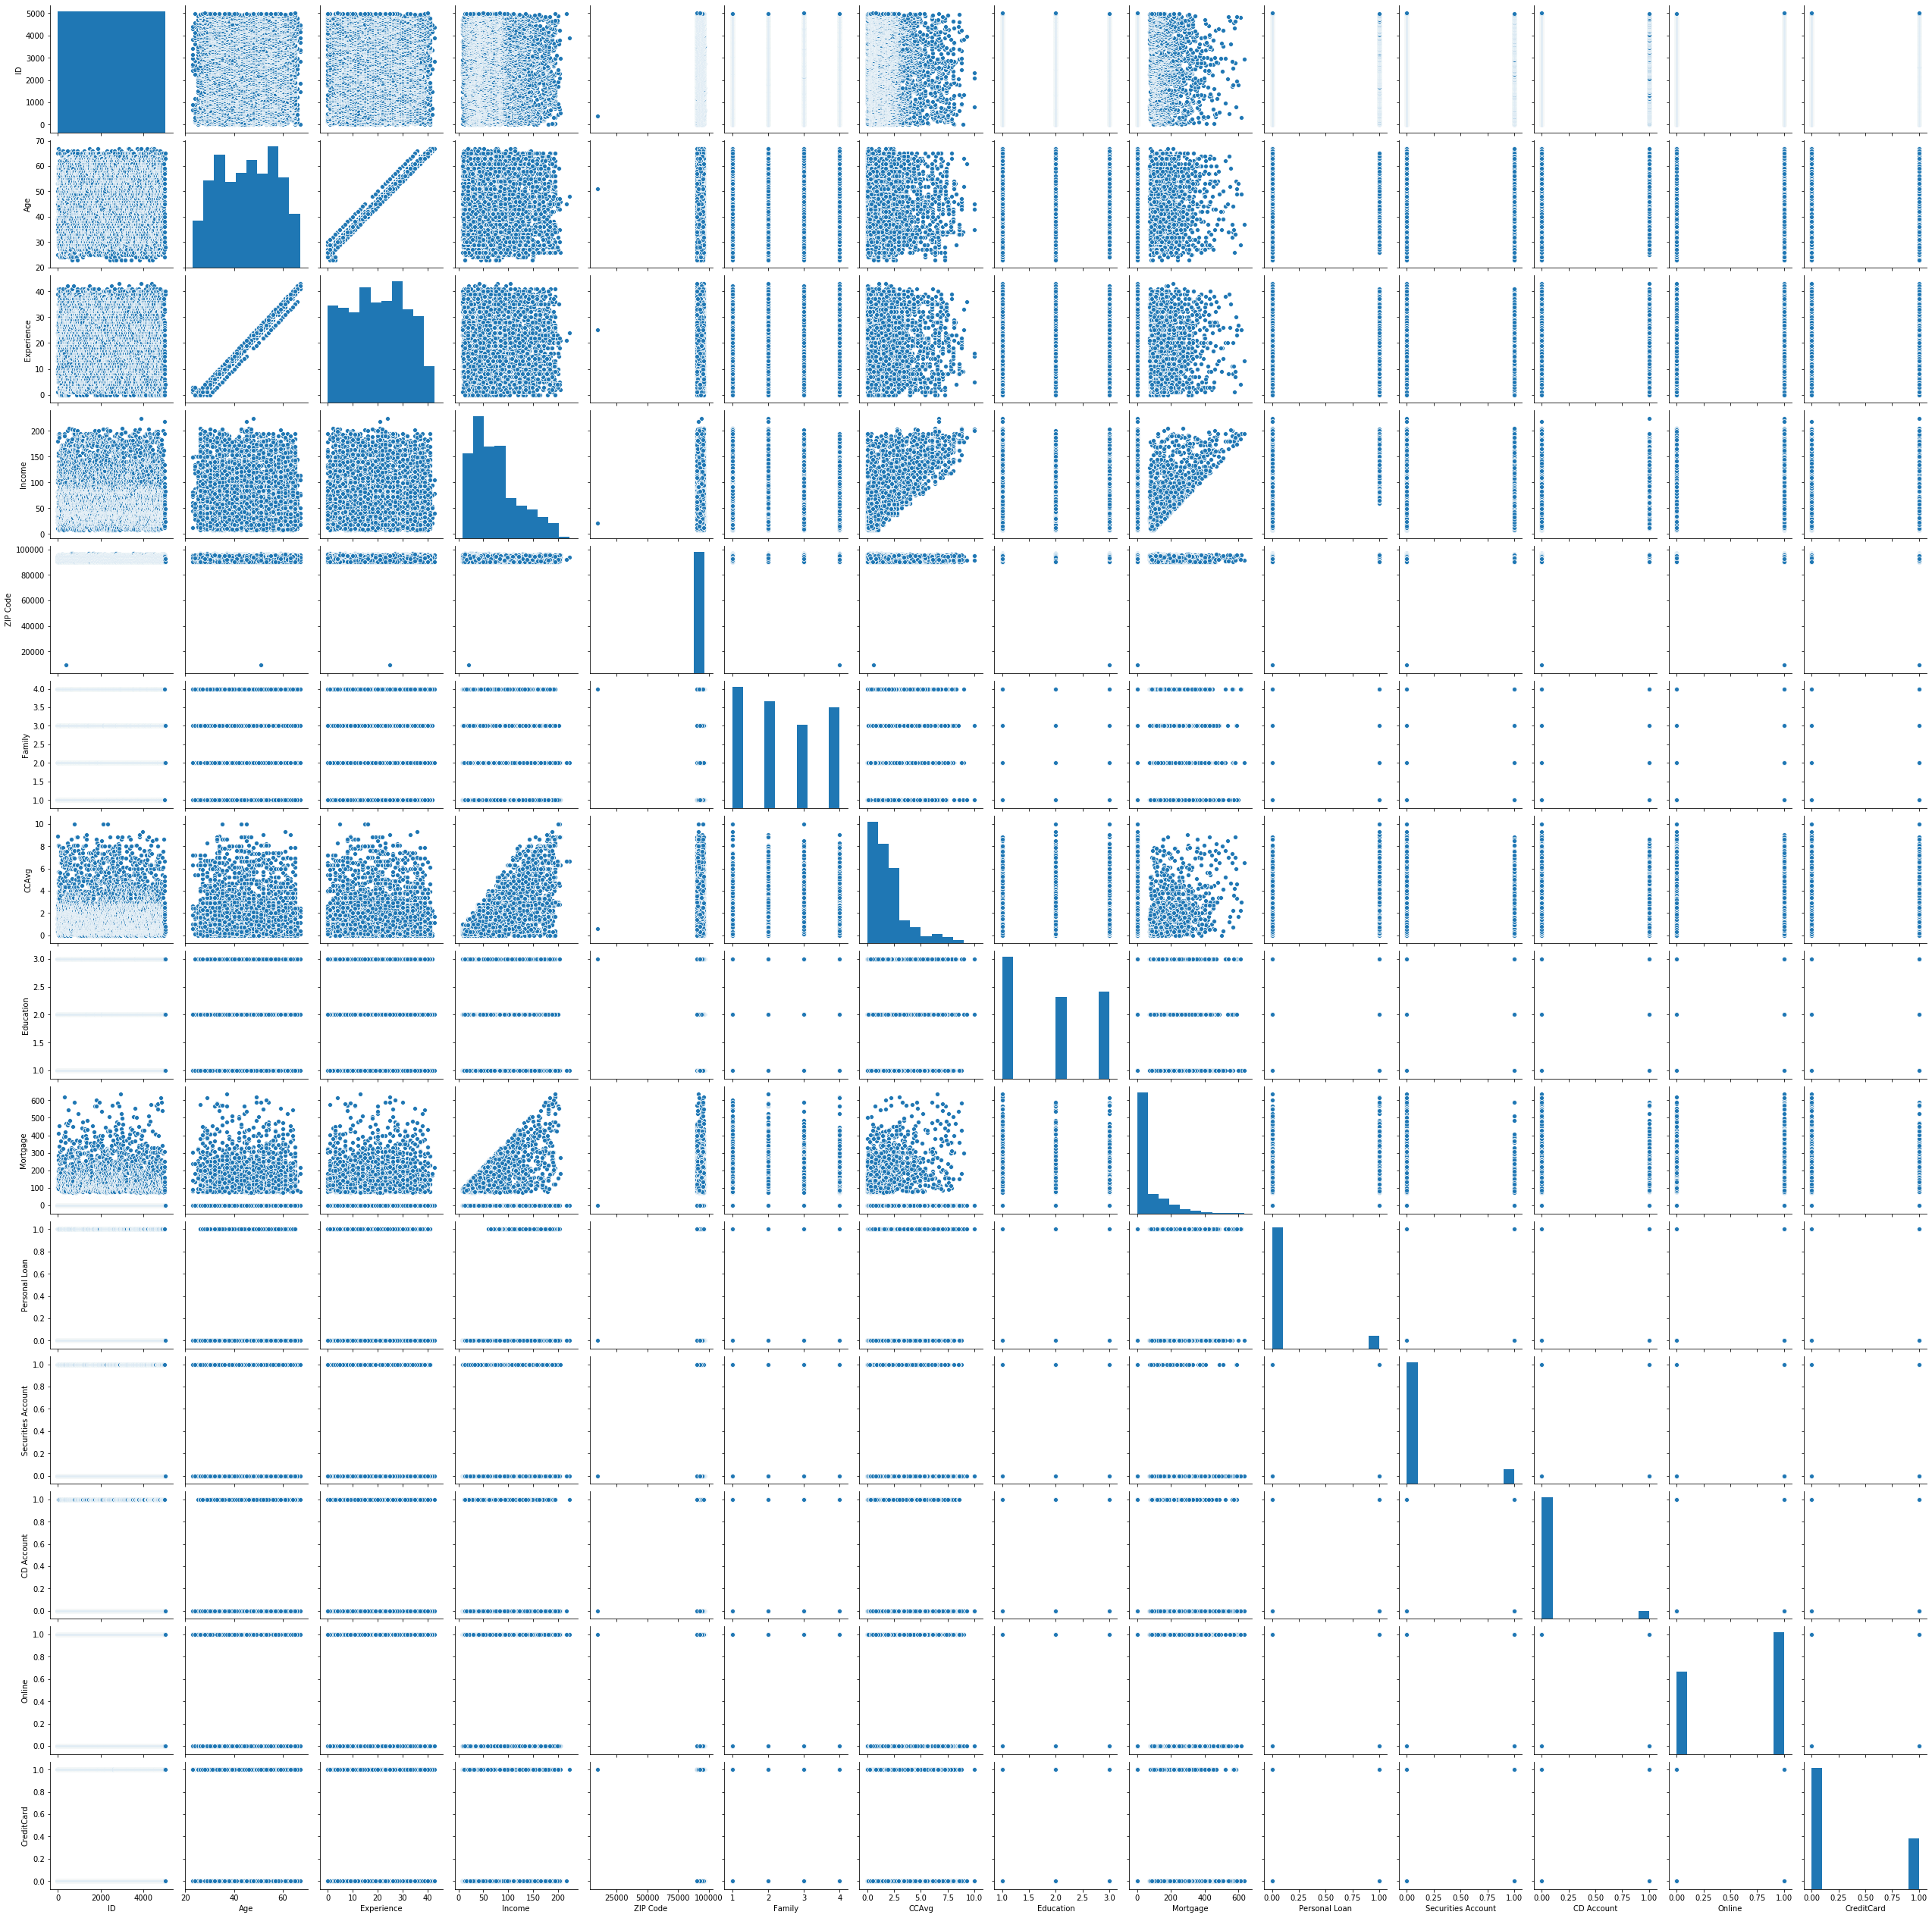

In [28]:
sns.pairplot(loan)

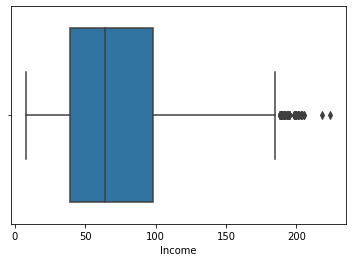

In [34]:
sns.boxplot(loan.Income);

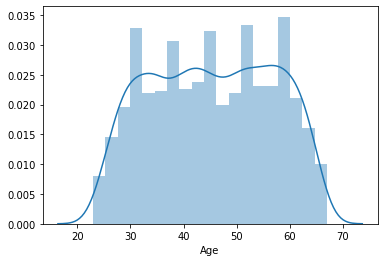

In [30]:
sns.distplot(loan.Age);

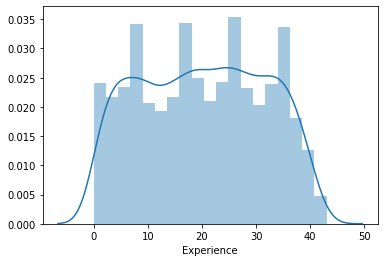

In [35]:
sns.distplot(loan.Experience);

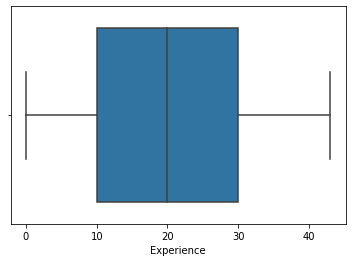

In [36]:
sns.boxplot(loan.Experience);

In [31]:
from scipy.stats import shapiro
shapiro(loan["Mortgage"])

(0.6281886696815491, 0.0)

In [32]:
shapiro(np.log(loan["Mortgage"]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(nan, 1.0)

In [33]:
loan[loan['Experience'] < 0]['Experience'].count()

0

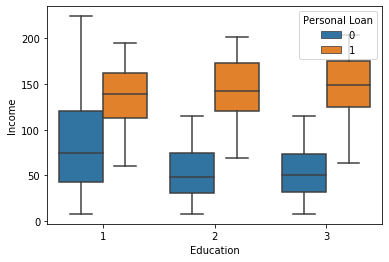

In [38]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loan)

#### The box plots show, those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

### Observation


#### Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 10 to 40 years and most earn an income between 10K to 100K with education of all levels.

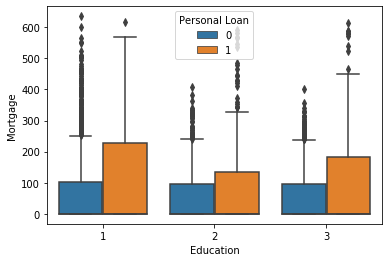

In [40]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loan);

## Customers who taken loan also have higher mortgages.

In [57]:
zipcodeTop5 = [loan.Online == 1]['ZIP Code'].value_counts().head(5)
zipcodeTop5

TypeError: list indices must be integers or slices, not str

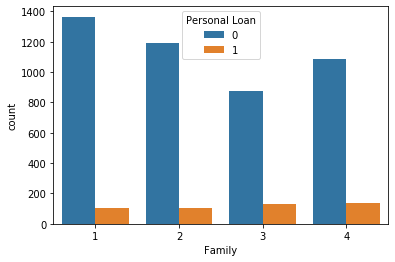

In [59]:
sns.countplot(x="Family", data=loan,hue="Personal Loan")

In [67]:
loan_new = loan.rename(columns={'Personal Loan': 'PersonalLoan', 'ZIP Code': 'ZIPCode'})

In [68]:
loan_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
familysize_no = np.mean(loan_new[loan_new.PersonalLoan == 0]['Family'])
familysize_no

2.3734513274336284

In [73]:
familysize_yes = np.mean( loan_new[loan_new.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [76]:
zipcode_top5 = loan_new[loan_new.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

### Observation

#### Family size seems to have no impact on decision to take a loan.

#### Top 5 locations who appled personal loan before

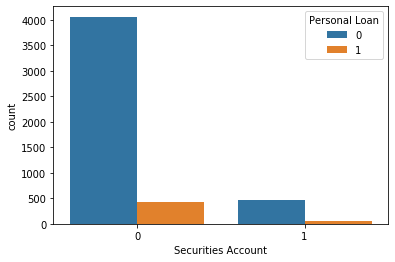

In [77]:
sns.countplot(x="Securities Account", data=loan,hue="Personal Loan")

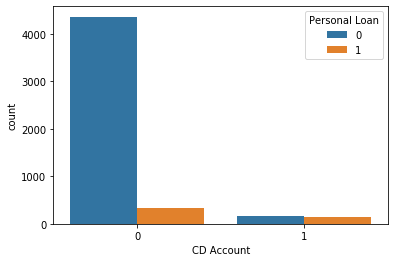

In [79]:
sns.countplot(x="CD Account", data=loan,hue="Personal Loan")

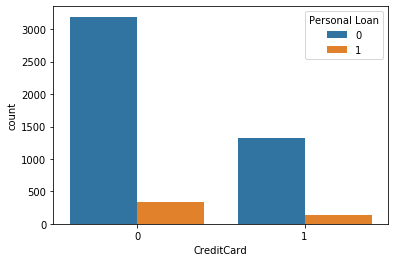

In [82]:
sns.countplot(x="CreditCard", data=loan,hue="Personal Loan")

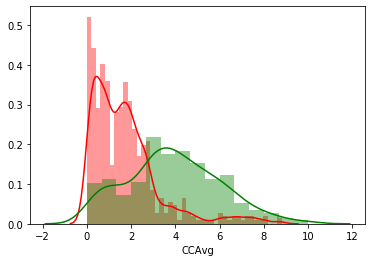

In [84]:
sns.distplot( loan_new[loan_new.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( loan_new[loan_new.PersonalLoan == 1]['CCAvg'], color = 'g')

### Observation


#### Customers who have taken personal loan have higher credit card average compared to those who are not taken. So high credit card average seems to be good predictor point whether or not a customer will take a personal loan.

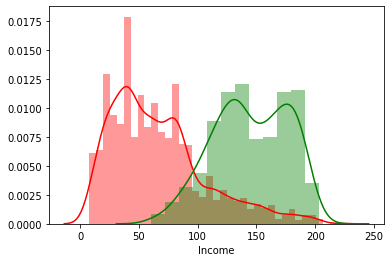

In [85]:
sns.distplot( loan_new[loan_new.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( loan_new[loan_new.PersonalLoan == 1]['Income'], color = 'g')

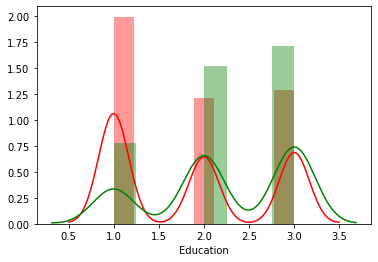

In [87]:
sns.distplot( loan_new[loan_new.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot(loan_new[loan_new.PersonalLoan == 1]['Education'], color = 'g')

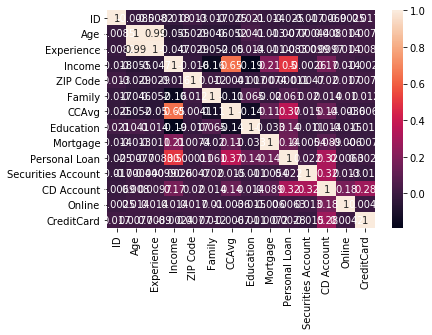

In [88]:
corrMatrix = loan.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

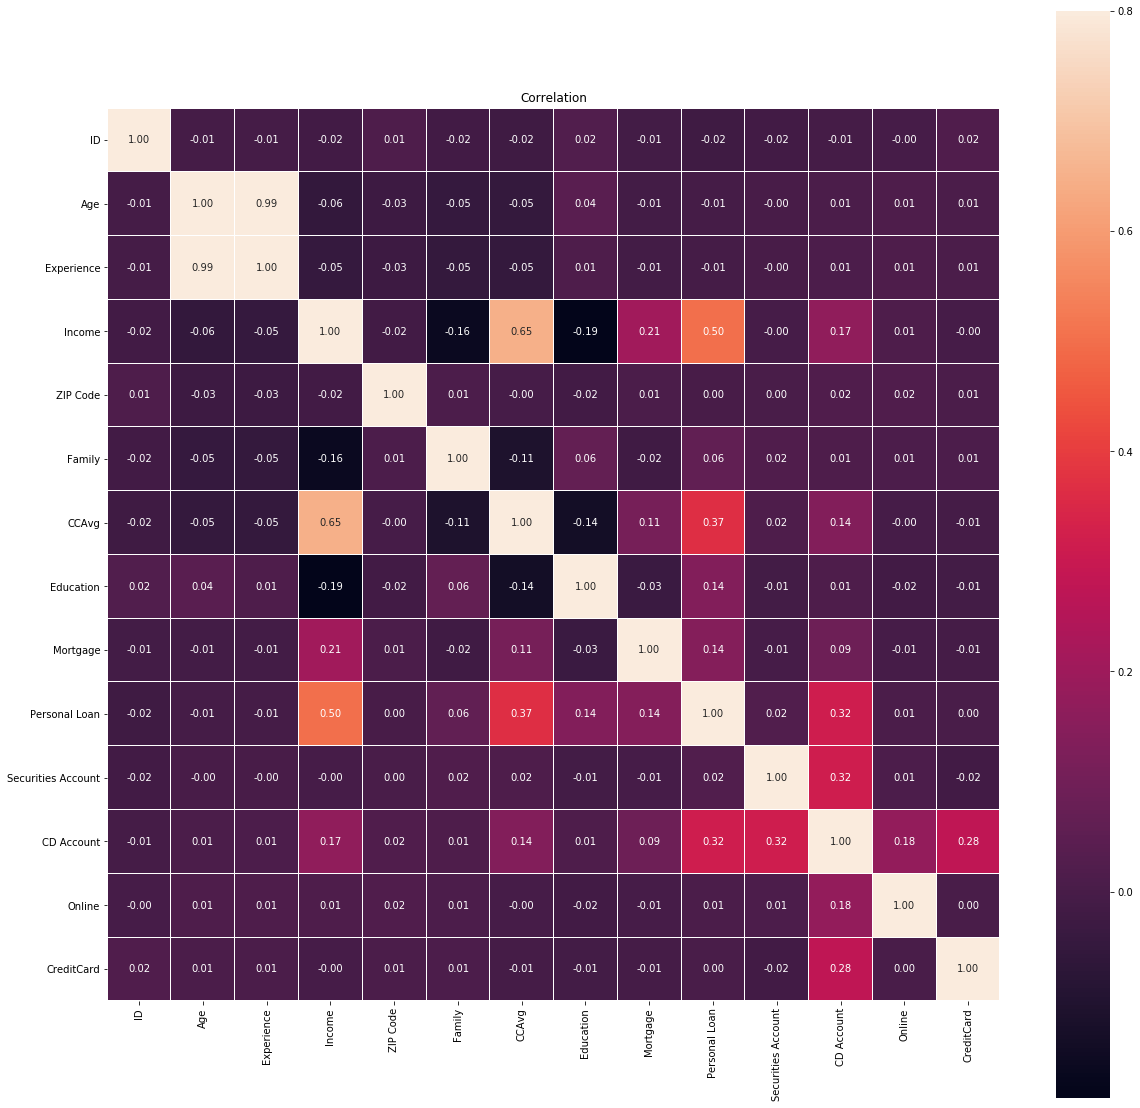

In [89]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(loan.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Observation

#### Age and Experience is highly corelated

#### Income and Credit card Average is also corelated

## 3. Split the data into training and test set in the ratio of 70:30 respectively

In [106]:
X = loan.drop('Personal Loan', axis=1)
Y = loan['Personal Loan']

In [107]:
## split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100,test_size=0.3,stratify=Y)

In [108]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('X_test shape:', X_test.shape)

X_train shape: (3500, 13)
y_train shape: (3500,)
X_test shape: (1500, 13)
X_test shape: (1500, 13)


###  Logistic Regression model to predict

In [110]:
from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(X_train,y_train)# fit the model
print("Intercept of the linear equation:",lm.intercept_) # see the intercept
print()
print("Coefficients of the equation are:")
print(lm.coef_)# see the coefficients
print()

#see the error parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#make prediction
pred=lm.predict(X_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print()
print("RMSE:",mean_squared_error(y_test,pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, pred))

Intercept of the linear equation: -0.4363580762970287

Coefficients of the equation are:
[-2.30887911e-06 -3.37155471e-03  4.09952566e-03  2.99408427e-03
  1.57256502e-06  3.63362574e-02  1.08371381e-02  7.53271557e-02
  7.41782386e-05 -6.40075673e-02  3.35864191e-01 -2.71095666e-02
 -4.23217608e-02]

Mean Absolute Error: 0.15644611809833953

RMSE: 0.2308449410101354

R2 Squarred: 0.3859537842232106


In [118]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [119]:
X_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2157,2158,25,0,71,93727,4,0.2,1,78,1,0,0,0
397,398,26,2,48,90503,3,0.7,2,0,0,0,1,0
1376,1377,63,39,45,92870,4,1.3,2,86,0,0,0,0
1114,1115,32,8,39,95827,1,1.7,1,0,0,0,1,1
3119,3120,61,36,54,91320,3,0.9,3,179,0,0,1,0


So, Personal Loan = -0.43, Age = -3.37 Experience = 4.09, Income = 2.99 

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Accuracy of training data set: ', regressor.score(X_train, y_train))
print('Accuracy of testing data set: ', regressor.score(X_test, y_test))

Accuracy of training data set:  0.38554070365647086
Accuracy of testing data set:  0.3859537842232106


In [124]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

lm= sm.OLS(y_train,X2).fit()

print("Pvalues for each column:")
print()
print(lm.pvalues)

Pvalues for each column:

const                  1.616019e-02
ID                     3.962879e-01
Age                    2.944654e-01
Experience             2.051085e-01
Income                1.157235e-134
ZIP Code               3.665933e-01
Family                 1.370412e-25
CCAvg                  2.253710e-04
Education              1.798065e-51
Mortgage               6.087824e-02
Securities Account     2.109013e-06
CD Account             4.095942e-71
Online                 8.688528e-04
CreditCard             3.014658e-06
dtype: float64


In [125]:
#to see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Personal Loan   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:42:29   Log-Likelihood:                 163.57
No. Observations:                3500   AIC:                            -299.1
Df Residuals:                    3486   BIC:                            -212.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4364      0

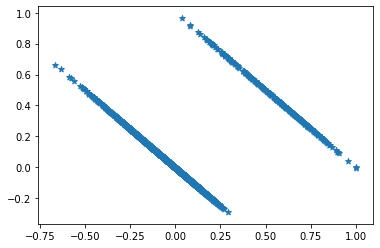

In [126]:
plt.scatter(lm.resid, lm.predict(),marker='*') # Plot between residual(actual - predicted) and predicted values
plt.show()

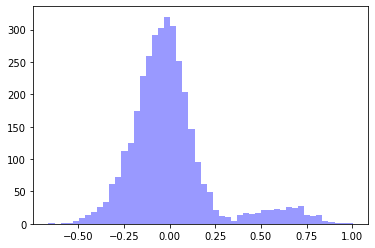

In [127]:
# error distribution
sns.distplot(lm.resid, hist=True, kde=False, color = 'blue')
plt.show()

In [129]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
# training Score
regression_model.score(X_train, y_train)

0.38554070365647086

In [132]:
#testing score
regression_model.score(X_test, y_test)

0.3859537842232106

In [133]:
#RMSE
mean_squared_error(y_test,regression_model.predict(X_test))**0.5

0.2308449410101354

###  5 Reasoning on how model perform better:

#### 1. Training score and Testing score are more or less equal and very close which indicates that we avoided over-fitting. We can mention that this is a good indication that we have not over-fit the model.

#### 2. R2 Score measures 0.386, says that only 39 % of variation were explained by the model, higher the R2 score better it is.

#### 3. RMSE gives you on average how much the predicted value is deviating from observed value, 0.23 is very less.

#### 4. Looking at RMSE and R2 score we can say that model is good enough.


In [148]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000043  0.006341  0.005803  0.035628 -0.000068  0.006329  0.002924   

          7         8         9        10        11        12  intercept  
0  0.006376  0.000731  0.000377  0.002091 -0.000005  0.000198  -0.000041  


In [147]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(y_test, y_predict).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1321,92
Yes,35,52


## 6. Business understanding of model.

#### The box plots shows, with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

#### Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 10 to 40 years and most earn an income between 10K to 100K with education of all levels.

#### Customers who taken loan also have higher mortgages.

#### Customers who have taken personal loan have higher credit card average compared to those who are not taken. So high credit card average seems to be good predictor point whether or not a customer will take a personal loan.